In [218]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [187]:
%autoreload 2

import sys,os,glob
import matplotlib
import matplotlib.pyplot as plt

## Add own library to path
workdir = os.getcwd()
thismodule = sys.modules[__name__]
moduledir = os.path.join(os.path.dirname(workdir),'src')
functionsdir = os.path.join(os.path.dirname(workdir),'plotting/src')
sys.path.insert(0,moduledir)
sys.path.insert(0,functionsdir)
for includedir in [moduledir,functionsdir]:
    print("Own modules available:", [os.path.splitext(os.path.basename(x))[0]
                                     for x in glob.glob(os.path.join(includedir,'*.py'))])

from conditionalstats import *
from plot1DInvLog import *
from plot1D import *

## Graphical parameters
plt.style.use(os.path.join(matplotlib.get_configdir(),'stylelib/presentation.mplstyle'))

Own modules available: ['conditionalstats']
Own modules available: ['plot2D', 'plot1D', 'plotCondPDFs', 'plot1DInvLog']


In [180]:
print(defaultD)

bin_locations_stored : False
bins : None
bintype : linear
density : None
fill_last_decade : None
name : 
nbins : 50
nbpd : None
nd : None
nppb : None
overwrite : False
percentiles : None
rank_edges : None
ranks : None
size : 0
vmax : None
vmin : None



# Example distributions on linear bins

In [181]:
x_norm = np.random.normal(size=int(1e7)) # Sampling a standard normal distribution
xmax = 4
xmin = -xmax

In [8]:
y_lognorm = np.exp(x_norm) # lognormal distribution from x
ymin,ymax = np.exp(xmin),np.exp(xmax)

In [9]:
dist_x_linear = Distribution(name='x',nbins=40)
dist_x_linear.computeDistribution(sample=x_norm,vmin=xmin,vmax=xmax)

In [10]:
dist_y_linear = Distribution(name='y',nbins=40)
dist_y_linear.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

In [11]:
print(dist_x_linear)

bin_locations_stored : False
bins : [-4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2 -2.  -1.8 -1.6 -1.4
 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8  1.   1.2  1.4
  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8  4. ]
bintype : linear
density : [2.03012648e-04 4.37027227e-04 8.42552491e-04 1.80361237e-03
 3.32170694e-03 6.15638354e-03 1.05711586e-02 1.75200915e-02
 2.84777742e-02 4.44417687e-02 6.59666097e-02 9.43918806e-02
 1.29996099e-01 1.71535687e-01 2.17769067e-01 2.65772558e-01
 3.11700919e-01 3.51443395e-01 3.80856727e-01 3.96394695e-01
 3.96599208e-01 3.80998736e-01 3.51816418e-01 3.11725420e-01
 2.66193084e-01 2.17751066e-01 1.71478683e-01 1.29887592e-01
 9.42053690e-02 6.60301137e-02 4.42867591e-02 2.85122763e-02
 1.77066031e-02 1.05036544e-02 6.06087759e-03 3.35720915e-03
 1.74160850e-03 9.02056198e-04 4.34027040e-04 2.06512866e-04]
fill_last_decade : None
frac_above_vmax : 3.13e-05
frac_below_vmin : 3.1e-05
name : x
nbins : 40
nbpd : None
nd : Non

Text(0, 0.5, 'Cumulative density (CDF)')

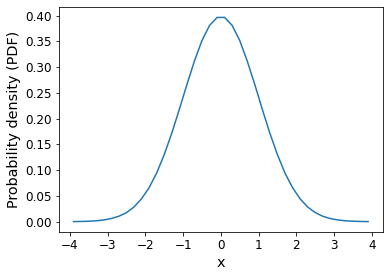

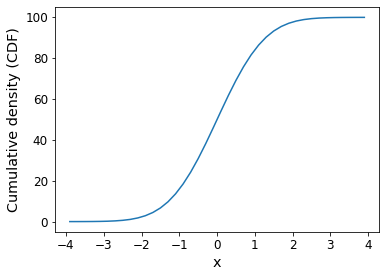

In [12]:
d = dist_x_linear
plt.plot(d.percentiles,d.density)
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

# Example distributions on logarithmic bins

In [13]:
dist_y_log = Distribution(name='y',bintype='log',nbpd=50)
dist_y_log.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

In [14]:
# print(dist_y_log)

Text(0, 0.5, 'Probability density (PDF)')

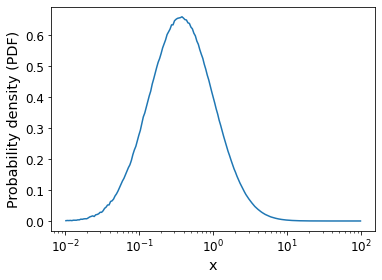

In [15]:
d = dist_y_log
plt.plot(d.percentiles,d.density)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

The lognormal distribution, initially generated on regularly-spaced bins in x, appears noisier in bins containing few points after the logarithmic transformation. A lognormal process should appear smoother.

Text(0.5, 0, 'x')

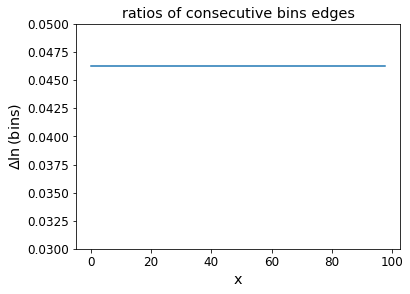

In [16]:
bin_ratios = np.log(dist_y_log.bins[1:]/dist_y_log.bins[:-1])
plt.plot(dist_y_log.percentiles,bin_ratios)
# plt.xscale('log')
plt.title('ratios of consecutive bins edges')
plt.ylim((0.03,0.05))
plt.ylabel(r'$\Delta \ln$(bins)')
plt.xlabel('x')

# Example distribution on linear ranks (10th,20th,30th,...)

In [17]:
nlr = 50
rank_edges = np.linspace(0,100,nlr+1)
print(rank_edges)
ranks = np.convolve(rank_edges,[0.5,0.5],mode='valid')
print(ranks)
print(ranks.size)


[  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.
  28.  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.
  56.  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.
  84.  86.  88.  90.  92.  94.  96.  98. 100.]
[ 1.  3.  5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33. 35.
 37. 39. 41. 43. 45. 47. 49. 51. 53. 55. 57. 59. 61. 63. 65. 67. 69. 71.
 73. 75. 77. 79. 81. 83. 85. 87. 89. 91. 93. 95. 97. 99.]
50


In [18]:
dist_x_linQ = Distribution(name='x',bintype='linQ',nbins=100)
dist_x_linQ.computeDistribution(sample=x_norm,vmin=xmin,vmax=xmax)

In [19]:
dist_x_linQ.bins

array([-4.00000000e+00, -2.32617670e+00, -2.05445192e+00, -1.88145764e+00,
       -1.75149916e+00, -1.64557508e+00, -1.55532836e+00, -1.47616996e+00,
       -1.40565172e+00, -1.34104945e+00, -1.28213432e+00, -1.22681944e+00,
       -1.17537847e+00, -1.12687244e+00, -1.08076906e+00, -1.03671127e+00,
       -9.94718531e-01, -9.54480197e-01, -9.15710491e-01, -8.78079162e-01,
       -8.41577270e-01, -8.06445685e-01, -7.72034752e-01, -7.38695585e-01,
       -7.06279685e-01, -6.74303269e-01, -6.43226316e-01, -6.12659539e-01,
       -5.82692262e-01, -5.53408179e-01, -5.24381709e-01, -4.95768938e-01,
       -4.67589820e-01, -4.39795385e-01, -4.12266331e-01, -3.85039328e-01,
       -3.58092801e-01, -3.31431278e-01, -3.05255767e-01, -2.79033364e-01,
       -2.53062312e-01, -2.27218266e-01, -2.01653700e-01, -1.76126939e-01,
       -1.50704771e-01, -1.25507234e-01, -1.00286160e-01, -7.50772979e-02,
       -4.99699170e-02, -2.48609433e-02,  2.02316045e-04,  2.52475348e-02,
        5.03074918e-02,  

Text(0, 0.5, 'Cumulative density (CDF)')

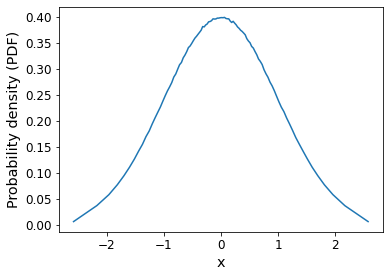

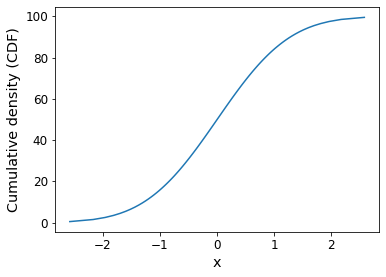

In [20]:
d = dist_x_linQ
plt.plot(d.percentiles,d.density)
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')
plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

There, the sampling is such that percentiles ranges of a given width contain a constant number of points (y-axis of bottom panel is regularly sampled): bins in the middle of the x-range have smaller sampling sizes.

In [21]:
dist_y_linQ = Distribution(name='y',bintype='linQ')
dist_y_linQ.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

Text(0, 0.5, 'Cumulative density (CDF)')

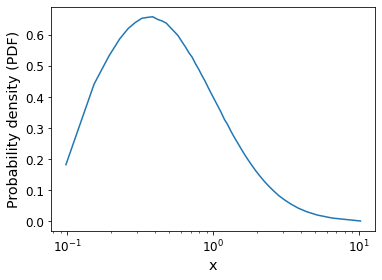

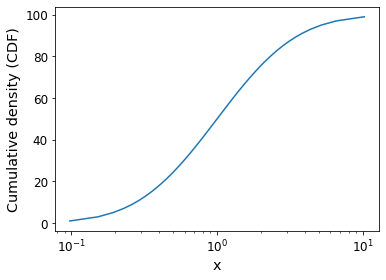

In [22]:
d = dist_y_linQ
plt.plot(d.percentiles,d.density)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

# Sample inverse-logarithmic ranks

In [23]:
dist_y_invlogQ = Distribution(name='y',bintype='invlogQ',nd=4,fill_last_decade=True)
dist_y_invlogQ.computeDistribution(sample=y_lognorm,vmin=ymin,vmax=ymax)

Text(0, 0.5, 'Cumulative density (CDF)')

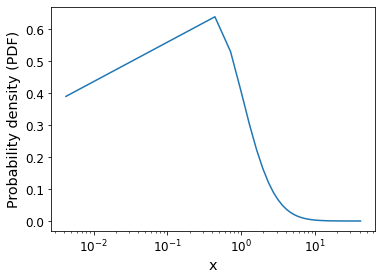

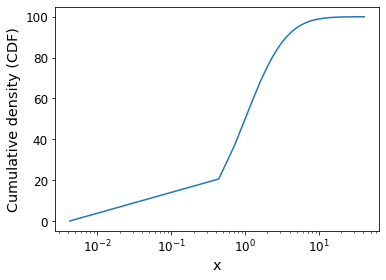

In [24]:
d = dist_y_invlogQ
plt.plot(d.percentiles,d.density)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Probability density (PDF)')

plt.figure()
plt.plot(d.percentiles,d.ranks)
plt.xscale('log')
plt.xlabel('x')
plt.ylabel('Cumulative density (CDF)')

check that the curve bounds match
x bounds: 0.0 99.99
y bounds: 0.004229780422697979 41.10585676187411

check that the curve bounds match
x bounds: 0.0 99.99
y bounds: 0.004229780422697979 41.10585676187411



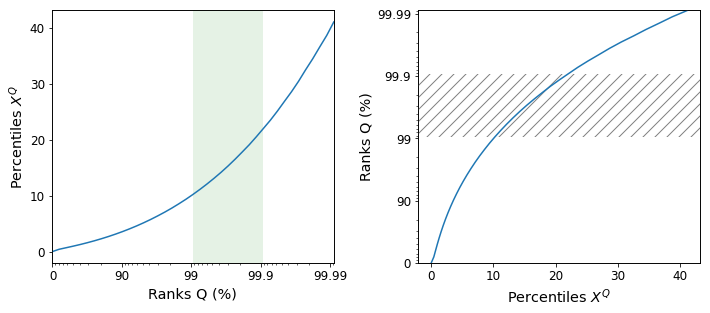

In [182]:
fig,axs = plt.subplots(ncols=2,figsize=(12,4.5))

ranks = d.ranks
perc = d.percentiles

#--- on IL x axis
ax=axs[0]
ax_show = ax.twiny()

#- set frame
setXaxisIL(ax,ranks)
#- show data
y = d.percentiles
showData(ax_show,ranks,perc)
#- add hatch
# addXHatch(ax_show,d.ranks,[20,30])
addXHatch(ax_show,ranks,[20,30],fill=True,hatch=None,alpha=0.1,color='g')

#- labels
ax.set_xlabel('Ranks Q (%)')
ax.set_ylabel('Percentiles $X^Q$')

print('check that the curve bounds match')
print('x bounds:',ranks[0],ranks[-1])
print('y bounds:',perc[0],perc[-1])
print()

#--- on IL y axis
ax=axs[1]
ax_show = ax.twinx()

#- set frame
setYaxisIL(ax,ranks)
#- show data
y = d.percentiles
showData(ax_show,ranks,perc,axisIL='y')
#- add hatch
addYHatch(ax_show,ranks,[20,30])

#- labels
ax.set_xlabel('Percentiles $X^Q$')
ax.set_ylabel('Ranks Q (%)')


print('check that the curve bounds match')
print('x bounds:',d.ranks[0],d.ranks[-1])
print('y bounds:',y[0],y[-1])
print()

# Equivalence between these sampling strategies

In [202]:
def plotMultiVisualization(axs,d,label,offset=0,setframe=True):
    
    if isinstance(d,list):
        pass

    else:
        axs[0,0].plot(d.percentiles,d.density,label=label)
        axs[0,1].plot(d.percentiles,d.density)
        axs[0,1].set_xscale('log')
        axs[1,0].plot(d.percentiles,d.ranks)
        axs[1,1].plot(d.percentiles,d.ranks)
        axs[1,1].set_xscale('log')
        
        subplotRanksILog(axs[2,0],d.ranks,d.percentiles,setframe=setframe)
        subplotRanksILog(axs[2,1],d.ranks,d.percentiles,setframe=setframe)
        axs[2,1].set_yscale('log')

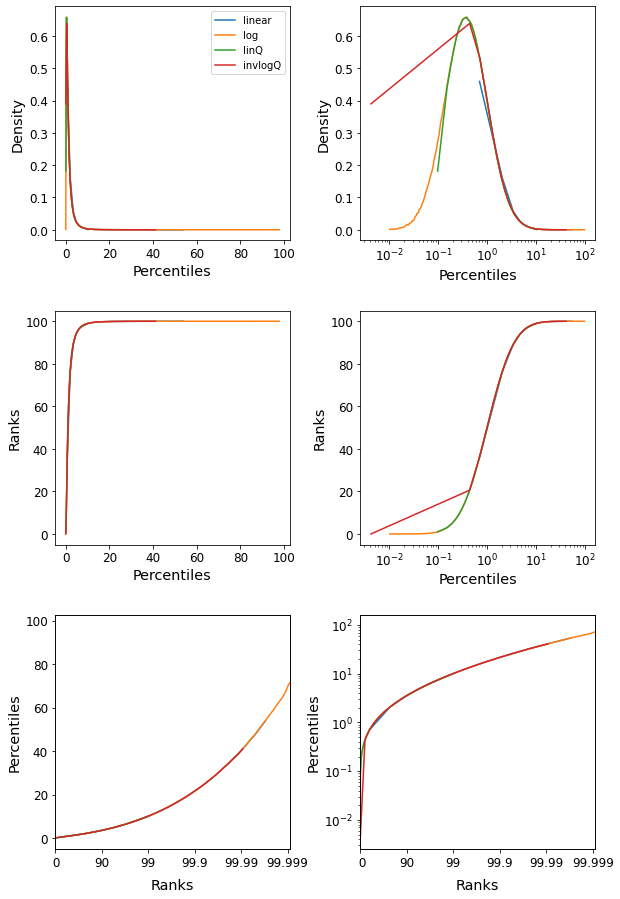

In [216]:
d_list = [dist_y_linear,dist_y_log,dist_y_linQ,dist_y_invlogQ]
d_lab = ['linear','log','linQ','invlogQ']

xlabels = ['Percentiles']*2+['Ranks']
ylabels = ['Density','Ranks','Percentiles']

fig,axs = plt.subplots(ncols=2,nrows=3,figsize=(10,15))

inds2plot = (0,1,2,3)

for i_d in inds2plot:
    plotMultiVisualization(axs,d_list[i_d],label=d_lab[i_d],offset=1,setframe=i_d==0)
    
# plt.rcParams["axes.labelpad"] = 4.0
#     axs[2,0].set_xlabel(labelpad=4.0)
    
for i in range(3):
    for j in range(2):
        axs[i,j].set_xlabel(xlabels[i],labelpad=4.0+25*(i==2))
        axs[i,j].set_ylabel(ylabels[i])
        

axs[0,0].legend()

plt.show()

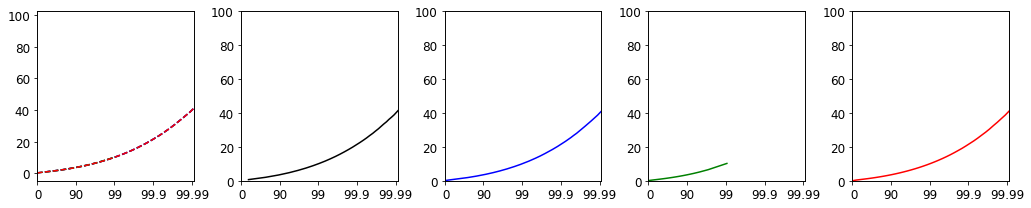

In [219]:
# Decompose last subplot into separate curves to check overlap

rank_list = [d.ranks for d in d_list]
perc_list = [d.percentiles for d in d_list]
cols = ['k','b','g','r']
ltypes = ['--']*4

rankmin=0
rankmax=99.99

fig,axs = plt.subplots(ncols=5,figsize=(18,3))

ax = axs[0]

subplotRanksILog(ax,rank_list,perc_list,rankmin=rankmin,rankmax=rankmax,col=cols,ltype=ltypes)

for i,d in zip(range(4),d_list):
    ax = axs[i+1]
    
    # Display
    subplotRanksILog(ax,rank_list[i],perc_list[i],rankmin=rankmin,rankmax=rankmax,col=cols[i])
    
    # Set y range
    ax.set_ylim(0,100)
    
